Converged after 2506 iterations
Solving for 41x41 grid...


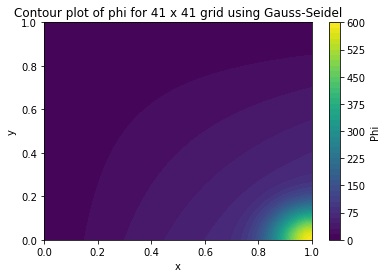

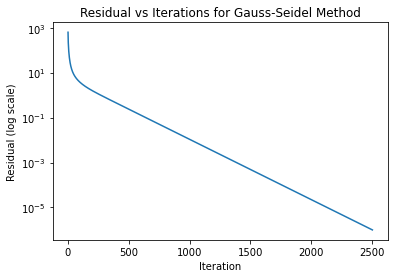

Converged after 9581 iterations
Solving for 81x81 grid...


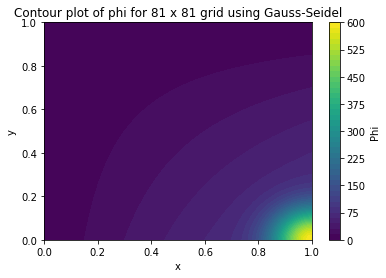

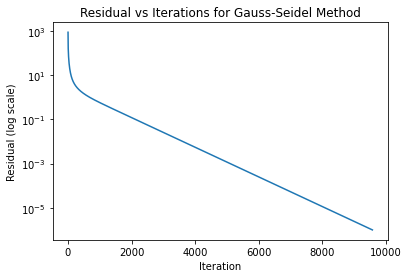

Solving for 161x161 grid...


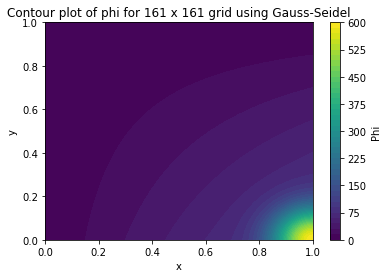

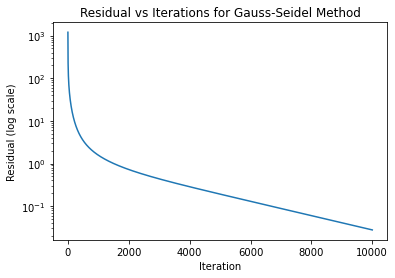

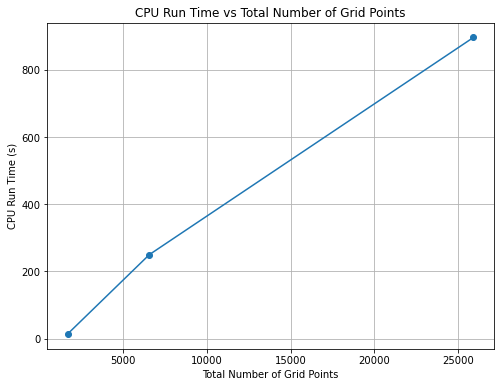

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

grids = [41, 81, 161]
run_times = []
for N in grids:
    # Defining the parameters
    L = 1.0
    dx = L / (N - 1)
    dy = L / (N - 1)
    max_iter = 10000 
    tolerance = 1e-6 #for convergence

    # Source term
    def source_term(x, y):
        return 50000 * np.exp(-50 * ((1 - x) ** 2 + y ** 2)) * (100 * ((1 - x) ** 2 + y ** 2) - 2)

    ## Boundary conditions
    def phi_bc(x, y, bound):
        if bound == 'L':
            return 500 * np.exp(-50 * (1 + y ** 2))
        elif bound == 'R':
            return 100 * (1 - y) + 500 * np.exp(-50 * y ** 2)
        elif bound == 'B':
            return 100 * x + 500 * np.exp(-50 * (1 - x) ** 2)
        elif bound == 'T':
            return 500 * np.exp(-50 * ((1 - x) ** 2 + 1))

    ## initializing the solution
    phi = np.zeros((N, N))

    ## setting the boundary conditions
    x = np.linspace(0, L, N)
    y = np.linspace(0, L, N)

    for j in range(N):
        phi[j, 0] = phi_bc(0, y[j], 'L')      # Left boundary
        phi[j, -1] = phi_bc(1, y[j], 'R')    # Right boundary

    for i in range(N):
        phi[0, i] = phi_bc(x[i], 0, 'B')    # Bottom boundary
        phi[-1, i] = phi_bc(x[i], 1, 'T')      # Top boundary

    ## Gauss-Seidel Iterative Method

    start_time = time.time()
    residuals = []  # To track residuals for plotting

    for iteration in range(max_iter):
        phi_old = np.copy(phi)
        for j in range(1, N-1):
            for i in range(1, N-1):

                phi[j, i] = 0.25 * (phi[j+1, i] + phi[j-1, i] + phi[j, i+1] + phi[j, i-1] - dx * dy * source_term(x[i], y[j]))

        ## Calculating the residual
        residual = np.linalg.norm(phi - phi_old)
        residuals.append(residual)

        if residual < tolerance:
            print(f'Converged after {iteration+1} iterations')
            break
        end_time = time.time()


    #calculating the runtime
    print(f'Solving for {N}x{N} grid...')
    run_time = end_time - start_time
    run_times.append(run_time)
    ## Plotting the final solution as a contour plot
    X, Y = np.meshgrid(x, y)
    plt.contourf(X, Y, phi, 50, cmap='viridis')
    plt.colorbar(label='Phi')
    plt.title(f'Contour plot of phi for {N} x {N} grid using Gauss-Seidel')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    ## Plotting the residuals vs iterations
    plt.plot(residuals)
    plt.yscale('log')
    plt.xlabel('Iteration')
    plt.ylabel('Residual (log scale)')
    plt.title('Residual vs Iterations for Gauss-Seidel Method')
    plt.show()


# Plotting CPU run time vs number of grid points
plt.figure(figsize=(8, 6))
plt.plot([N**2 for N in grids], run_times, marker='o')
plt.xlabel('Total Number of Grid Points')
plt.ylabel('CPU Run Time (s)')
plt.title('CPU Run Time vs Total Number of Grid Points')
plt.grid(True)
plt.show()    
